## Import your stuff

In [1]:
import numpy as np
import simulators.jla_supernovae.jla_simulator as jla
import pydelfi.ndes as ndes
import pydelfi.delfi as delfi
import pydelfi.score as score
import pydelfi.priors as priors
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
%matplotlib inline

In [2]:
import pylab as plt
import pyccl as ccl
import scipy
from scipy.interpolate import interp1d

import matplotlib
%matplotlib inline

print("CCL version you are using:",ccl.__version__)

CCL version you are using: 2.1.0


In [3]:
font_config = {"size" : 10,
               "family" : "serif"}

matplotlib.rc("font", **font_config)
matplotlib.rc("text", usetex=True)
# Move title to make space for exponents of y axis
matplotlib.rc("axes", titlepad=5) 
matplotlib.rc("axes", titlesize="medium") 

# Make the figures bigger in the notebook
matplotlib.rc("figure", dpi=150)

color_map = plt.get_cmap("tab10")

paper_textwidth = 7.125
fig_size = (paper_textwidth/2, 2.6)

plot_adjust = dict(left=0.2, top=0.9, bottom=0.2)

In [4]:
#Load the benchmarks
bench=np.loadtxt('/home/aizhana/CCL/benchmarks/data/model1_hmf.txt')
log10mass = bench[0:,0]
sigma = bench[0:,1]
log10invsigma = bench[0:,2]
log10massfunc = bench[0:,3]

In [5]:
bench

array([[ 1.000000e+01,  3.605507e+00, -5.569663e-01, -1.570650e+00],
       [ 1.050000e+01,  3.204972e+00, -5.058242e-01, -1.518198e+00],
       [ 1.100000e+01,  2.821836e+00, -4.505318e-01, -1.462083e+00],
       [ 1.150000e+01,  2.457596e+00, -3.905104e-01, -1.402880e+00],
       [ 1.200000e+01,  2.113854e+00, -3.250751e-01, -1.342187e+00],
       [ 1.250000e+01,  1.792304e+00, -2.534117e-01, -1.283641e+00],
       [ 1.300000e+01,  1.494680e+00, -1.745481e-01, -1.234955e+00],
       [ 1.350000e+01,  1.222696e+00, -8.731863e-02, -1.212136e+00],
       [ 1.400000e+01,  9.779681e-01,  9.675300e-03, -1.248659e+00],
       [ 1.450000e+01,  7.619025e-01,  1.181006e-01, -1.416499e+00],
       [ 1.500000e+01,  5.755757e-01,  2.398976e-01, -1.877337e+00],
       [ 1.550000e+01,  4.195639e-01,  3.772018e-01, -3.015292e+00],
       [ 1.600000e+01,  2.936924e-01,  5.321073e-01, -5.803086e+00]])

In [6]:
scale_fact = 1.

# setting up different cosmology configuration to match benchmarks and keep CLASS from crashing.
cosmo_ccl1_mf = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, Omega_g=0, Omega_k=0,
                       h=0.7, sigma8=0.8, n_s=0.96, Neff=0, m_nu=0.0,
                       w0=-1, wa=0, T_CMB=2.7, transfer_function='bbks',
                       mass_function='tinker')

In [8]:
ccl.background.comoving_radial_distance(cosmo_ccl1_mf, a=1/(1+0.25))

1008.1401816054315

In [11]:
np.infty

inf

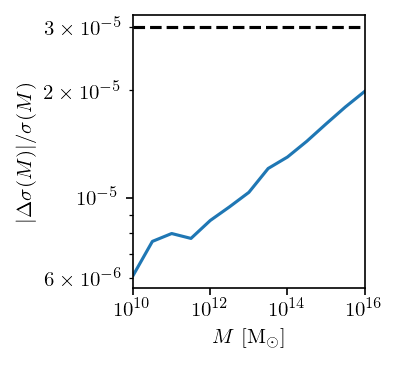

<Figure size 900x600 with 0 Axes>

In [17]:
accuracy = 3e-5

mass_function_fig_size = (paper_textwidth/3, fig_size[1])
mass_function_plot_adjust = plot_adjust.copy()
mass_function_plot_adjust["left"] = 0.3
mass_function_plot_adjust["right"] = 0.95

#This plot shows the relative difference in sigmaM predictions.
plt.figure(figsize=mass_function_fig_size)
plt.gcf().subplots_adjust(**mass_function_plot_adjust)
plt.ylabel(r'$|\Delta \sigma(M)|/\sigma(M)$')
plt.xlabel(r'$M$ [M$_{\odot}$]')
plt.gca().set_xscale('log')
plt.plot(10**log10mass, np.abs(ccl.sigmaM(cosmo_ccl1_mf,10**log10mass,scale_fact)/sigma-1),
        c=color_map(0))
plt.axhline(accuracy, c="k", ls="--")
plt.yscale("log")
plt.locator_params(axis="x", numticks=4)
plt.xlim(left=1e10,right=1e16)
plt.savefig('hmf_model1.pdf')
plt.show()
plt.clf()

In [18]:
import matplotlib.pyplot as plt

In [19]:
log10mass1 = bench[5:-2,0]
log10mass1

array([12.5, 13. , 13.5, 14. , 14.5, 15. ])

/home/aizhana/.conda/envs/fast-mpi4py/lib/python3.7/site-packages/pyccl/pyutils.py:407: CCLWarning: The function massfunc is deprecated. Use MassFunc instead.
  warnings.warn(s, CCLWarning)


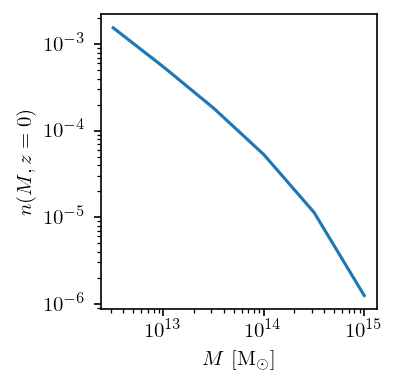

In [30]:
plt.figure(figsize=mass_function_fig_size)
plt.ylabel(r'$n(M, z=0)$')
plt.xlabel(r'$M$ [M$_{\odot}$]')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e13, 1e15)
plt.plot(10**log10mass1, ccl.massfunc(cosmo_ccl1_mf,10**log10mass1,scale_fact), c=color_map(0))

In [23]:
mass_funct = ccl.halos.hmfunc.MassFuncSheth99

In [26]:
mass_funct = ccl.halos.hmfunc.MassFuncBocquet16(cosmo_ccl1_mf)

In [27]:
mass_funct.get_mass_function(cosmo_ccl1_mf,10**log10mass1,scale_fact)

array([1.27659782e-03, 4.56510884e-04, 1.56749629e-04, 4.77921204e-05,
       1.08380795e-05, 1.21753407e-06])

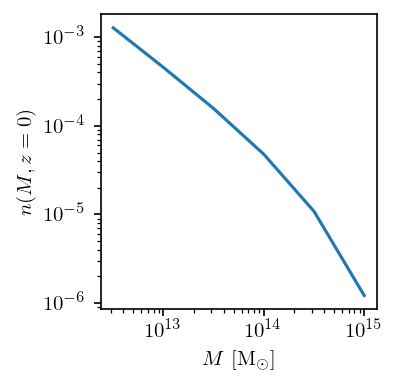

In [28]:
plt.figure(figsize=mass_function_fig_size)
plt.ylabel(r'$n(M, z=0)$')
plt.xlabel(r'$M$ [M$_{\odot}$]')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e13, 1e15)
plt.plot(10**log10mass1, mass_funct.get_mass_function(cosmo_ccl1_mf,10**log10mass1,scale_fact), c=color_map(0))

In [9]:
ccl.tracers.NumberCountsTracer

pyccl.tracers.NumberCountsTracer

## Set up the prior on parameters

In [3]:
# param_names = ['\\Omega_m', 'w_0', 'M_\mathrm{B}', '\\alpha', '\\beta', '\\delta M'] 

lower = np.array([0, -1.5, -20, 0, 0, -0.5])
upper = np.array([0.6, 0, -18, 1, 6, 0.5])
prior = priors.Uniform(lower, upper)

## Set up the compressor
Must have the signature `compressor(data, args)` -> `np.array([n_summaries])`<br>
In this case we are going to do Gaussian score compression $$\mathbf{t} = \boldsymbol\theta_* + \mathbf{F}^{-1}\nabla_\theta^T\boldsymbol\mu_*\mathbf{C}^{-1}(\mathbf{d}-\boldsymbol\mu_*)$$ using the class `score.Gaussian`. For this we'll need some fiducial parameters, the mean its derivative at the fiducial parameters, the inverse covariance, and the inverse Fisher matrix

# Step 2 - Specifying simulation vector
## Set up the simulator
This must have the signature `simulator(parameters, seed, args, batch)` -> `np.array([batch, ndata])`

In [4]:
JLASimulator = jla.JLA_Model()

def simulator(theta, seed, simulator_args, batch):
    
    return JLASimulator.simulation(theta, seed)

simulator_args = None

/home/aizhana/pydelfi/examples/simulators/jla_supernovae/jla_parser.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype = None, names = True)


In [5]:
theta_fiducial = np.array([0.3, -0.75, -19.05, 0.125, 2.65, -0.05])

mu = JLASimulator.apparent_magnitude(theta_fiducial)
Cinv = JLASimulator.Cinv

h = np.array(abs(theta_fiducial))*0.01
dmudt = JLASimulator.dmudt(theta_fiducial, h)

Compressor = score.Gaussian(len(JLASimulator.data), theta_fiducial, mu = mu, Cinv = Cinv, dmudt = dmudt)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args):
    return Compressor.scoreMLE(d)
compressor_args=None

# Step 1 - Specifying data vector. 
## Here the data vector is a compressed data vector

In [6]:
compressed_data = compressor(JLASimulator.data, compressor_args)

## Define ensemble of NDEs

In [7]:
NDEs = [ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=1, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=0),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=2, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=1),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=3, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=2),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=4, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=3),
       ndes.MixtureDensityNetwork(n_parameters=6, n_data=6, n_components=5, n_hidden=[30,30], activations=[tf.tanh, tf.tanh], index=4),
       ndes.ConditionalMaskedAutoregressiveFlow(n_parameters=6, n_data=6, n_hiddens=[50,50], n_mades=5, act_fun=tf.tanh, index=5)]

## Create DELFI object

In [8]:
DelfiEnsemble = delfi.Delfi(compressed_data, prior, NDEs, 
                            Finv = Finv, 
                            theta_fiducial = theta_fiducial, 
                            param_limits = [lower, upper],
                            param_names = ['\\Omega_m', 'w_0', 'M_\mathrm{B}', '\\alpha', '\\beta', '\\delta M'], 
                            results_dir = "simulators/jla_supernovae/results/",
                            input_normalization="fisher")

## Fisher pre-training to initialize the NDEs

Sampling approximate posterior...
Done.
Removed no burn in


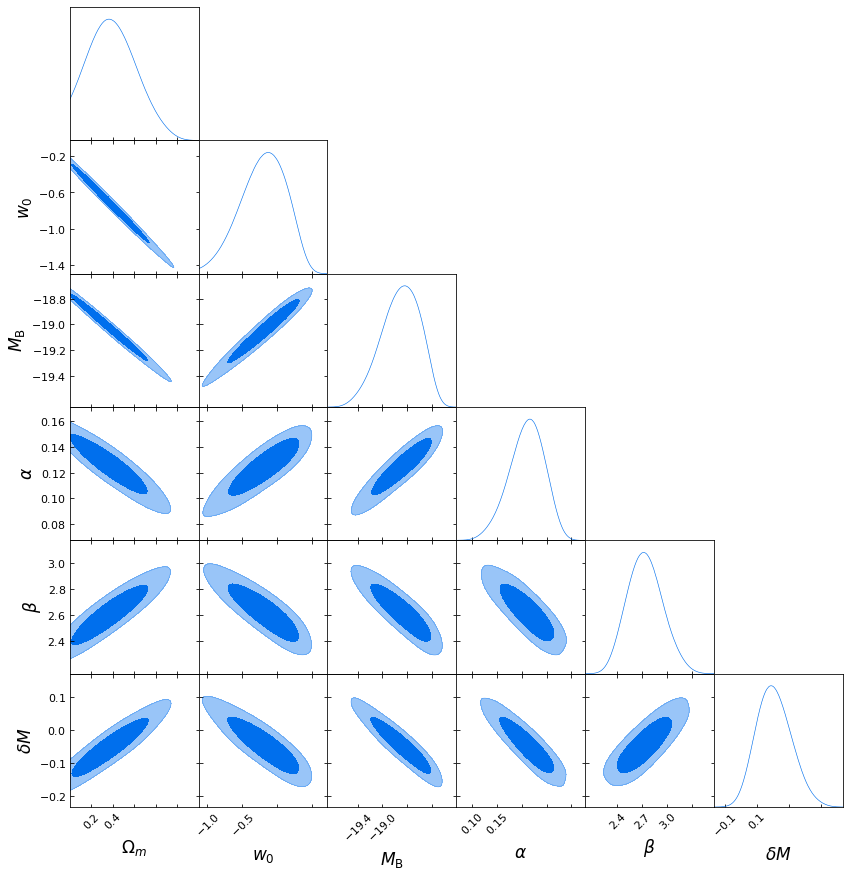

In [8]:
DelfiEnsemble.fisher_pretraining()

## Sequential Neural Likelihood

Population 1/20
Sampling proposal density...
Done.


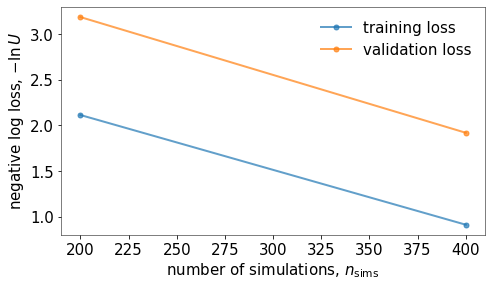

Population 2/20
Sampling proposal density...
Done.


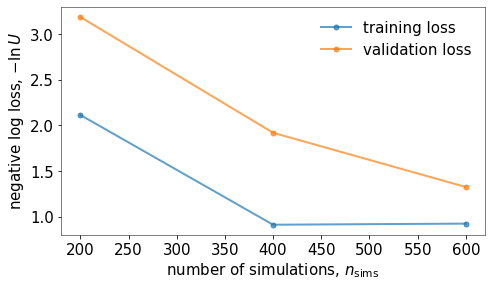

Population 3/20
Sampling proposal density...
Done.


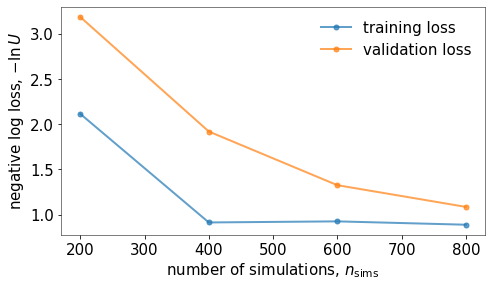

Population 4/20
Sampling proposal density...
Done.


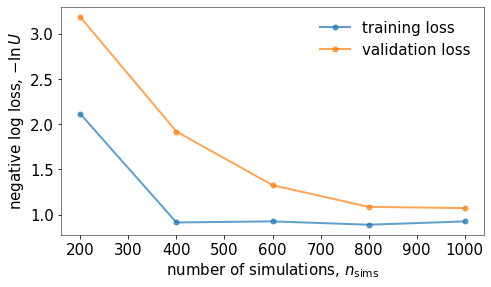

Population 5/20
Sampling proposal density...
Done.


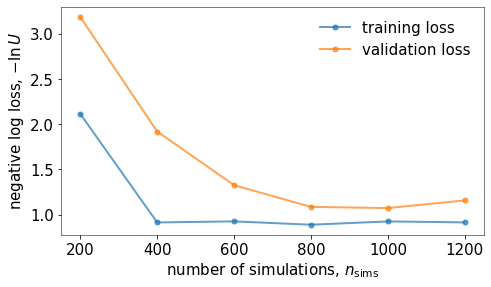

Population 6/20
Sampling proposal density...
Done.


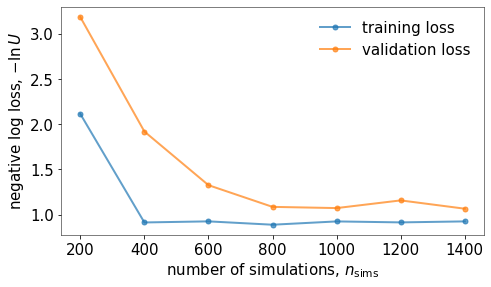

Population 7/20
Sampling proposal density...
Done.


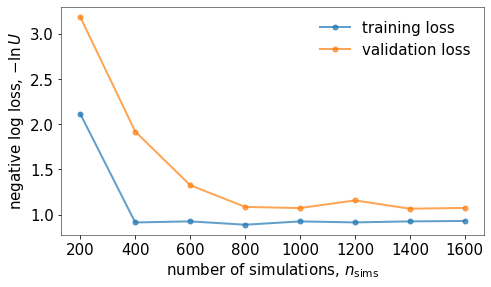

Population 8/20
Sampling proposal density...
Done.


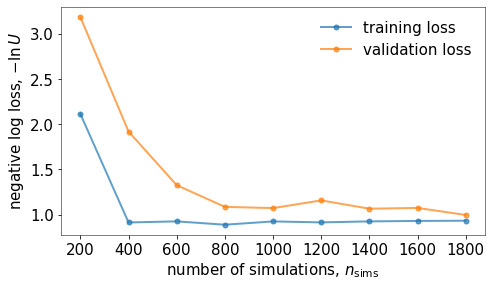

Population 9/20
Sampling proposal density...
Done.


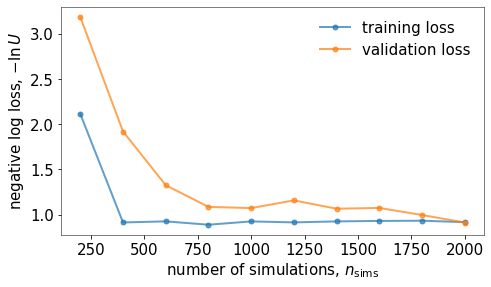

Population 10/20
Sampling proposal density...
Done.


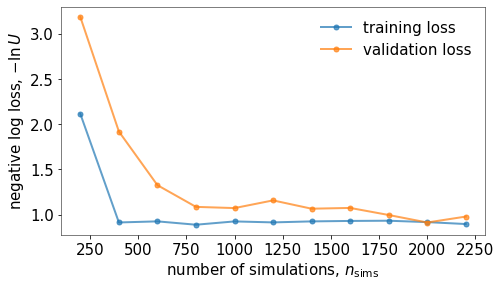

Population 11/20
Sampling proposal density...
Done.


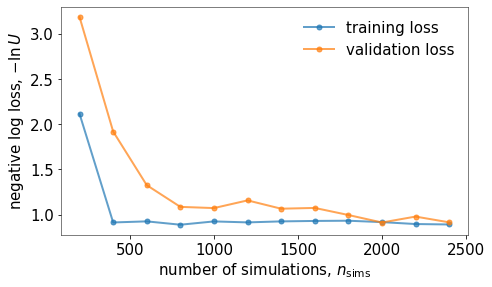

Population 12/20
Sampling proposal density...
Done.


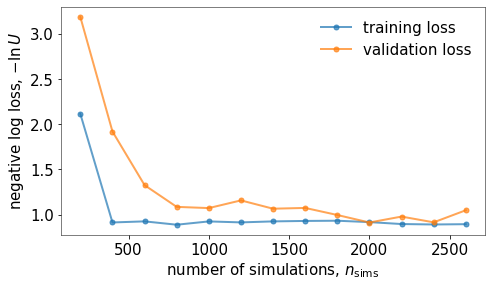

Population 13/20
Sampling proposal density...
Done.


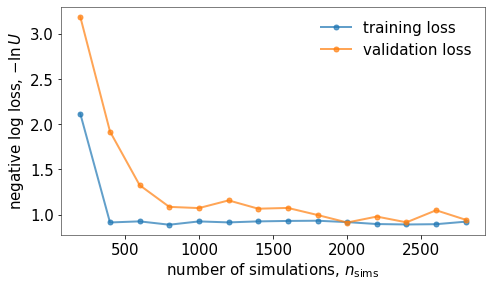

Population 14/20
Sampling proposal density...
Done.


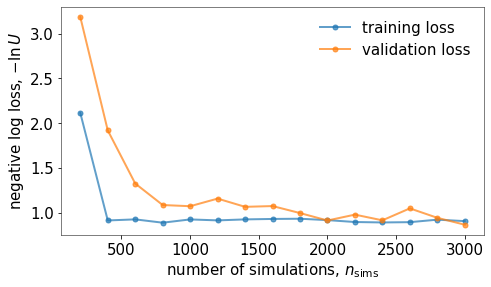

Population 15/20
Sampling proposal density...
Done.


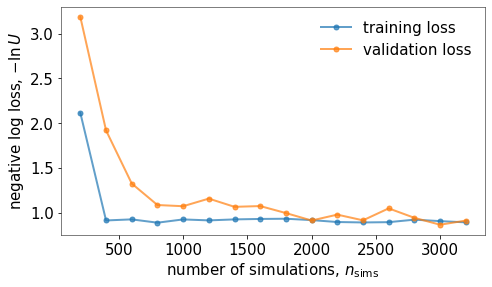

Population 16/20
Sampling proposal density...
Done.


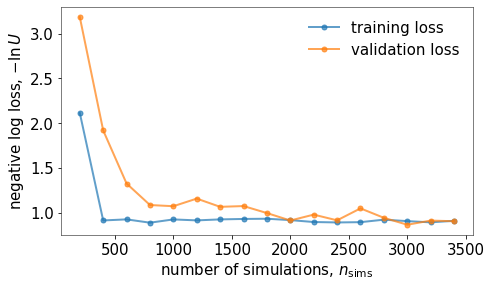

Population 17/20
Sampling proposal density...
Done.


In [ ]:
n_initial = 200
n_batch = 200
n_populations = 20

DelfiEnsemble.sequential_training(simulator, compressor, n_initial, n_batch, n_populations, patience=20,
                       save_intermediate_posteriors=False)

## Sample the learned posterior

In [ ]:
x0 = DelfiEnsemble.posterior_samples[np.random.choice(np.arange(len(DelfiEnsemble.posterior_samples)), p=DelfiEnsemble.posterior_weights.astype(np.float32)/sum(DelfiEnsemble.posterior_weights), replace=False, size=DelfiEnsemble.nwalkers),:]
posterior_samples, posterior_weights, log_prob = DelfiEnsemble.emcee_sample(x0=x0)

## Alright let's plot it!
Feed it a list of `(n_samples, n_parameters)` arrays for making a triangle plot; in this case let's just plot the posterior samples.

In [ ]:
DelfiEnsemble.triangle_plot(samples=[posterior_samples], weights=[posterior_weights])